In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [26]:
bank=pd.read_csv("bank-additional-full.csv")

In [27]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [28]:
bank_new=bank[["emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed","y"]]

In [29]:
bank_new.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.1,93.994,-36.4,4.857,5191.0,no
1,1.1,93.994,-36.4,4.857,5191.0,no
2,1.1,93.994,-36.4,4.857,5191.0,no
3,1.1,93.994,-36.4,4.857,5191.0,no
4,1.1,93.994,-36.4,4.857,5191.0,no


In [30]:
bank_new.tail()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,-1.1,94.767,-50.8,1.028,4963.6,no
41185,-1.1,94.767,-50.8,1.028,4963.6,no
41186,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,-1.1,94.767,-50.8,1.028,4963.6,no


In [31]:
cols=bank_new.columns[:-1]
cols

Index(['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed'],
      dtype='object')

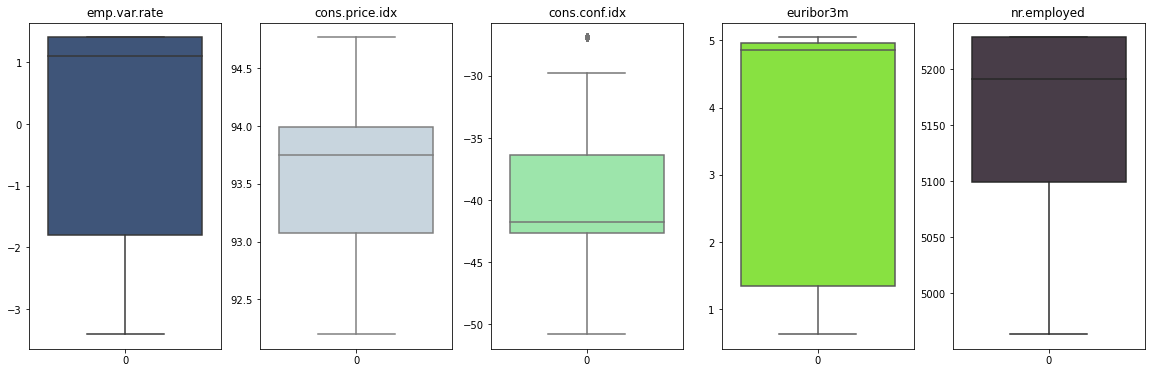

In [40]:
i=1
plt.figure(figsize=(20,6))
for col in cols:
    rgb=np.random.rand(4,)
    plt.subplot(1,5,i)
    sn.boxplot(data=bank_new[col],color=rgb)
    plt.title(col)
    i+=1


In [33]:
stats={}
for col in cols:
    stat=np.array(bank_new[[col]].describe())
    stats[col]={"count":stat[0][0],"mean":stat[1][0],"std":stat[2][0],"25%":stat[3][0],"50%":stat[4][0],"75%":stat[5][0],"max":stat[6][0]}

In [34]:
outliers=[]
for col in cols:
    for ind in range(len(bank_new)):
        if np.abs(bank_new[col][ind]-stats[col]["mean"])>3*stats[col]["std"]:
            outliers.append((ind, col))

In [35]:
outliers

[]

In [36]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
smote = SMOTE()
x = bank_new.iloc[:, :-1]
y = bank_new.iloc[:, -1]
ros = RandomOverSampler(random_state=42)

x_smote, y_smote = ros.fit_resample(x, y)

print('Original dataset shape', y.shape)
print('Resample dataset shape', y_smote.shape)

Original dataset shape (41188,)
Resample dataset shape (73096,)


In [37]:
y.value_counts()
y_smote.value_counts()

yes    36548
no     36548
Name: y, dtype: int64